In [13]:
# PART 1: Data Preprocessing
'''
Project: Mini Project 1 
Authors: Everyone write your names, Jacob Harper(201830230), Ratul Sarker(203087260)
Group ID: 15

'''

import os
import numpy as np


#######################################  adult  #######################################

#Instantiate array and add headings row
adult = np.empty((0,15))
headings = np.array([['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']])
adult = np.append(adult, headings.reshape(1,15), axis=0)


#Opening the file
# script_directory = os.path.dirname(os.path.abspath(__file__))
filename = 'adult.data'
fadult = open(filename, 'r')

#Copying all data into matrix
for line in fadult:
    values = line.strip().split(', ')
    row = np.array([[]])
    for value in values:
        if '.' in value:
            row = np.append(row, float(value))  # Convert to float if it contains a decimal point
        elif value.isdigit() or (value[0] == '-' and value[1:].isdigit()):
            row = np.append(row, int(value))  # Convert to int if it's a valid integer
        else:
            row = np.append(row, value)  # Keep as string if it's neither float nor int

    adult = np.append(adult, row.reshape(1,15), axis=0)
    # print(adult.shape)

fadult.close()
print(adult[:5])  # Print first 5 rows to check

# np.save('adult_num', adult, allow_pickle=True, fix_imports=True)


[['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
  'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
  'hours-per-week' 'native-country' 'income']
 ['39.0' 'State-gov' '77516' 'Bachelors' '13' 'Never-married'
  'Adm-clerical' 'Not-in-family' 'White' 'Male' '2174' '0' '40'
  'United-States' '<=50K']
 ['50.0' 'Self-emp-not-inc' '83311' 'Bachelors' '13' 'Married-civ-spouse'
  'Exec-managerial' 'Husband' 'White' 'Male' '0' '0' '13' 'United-States'
  '<=50K']
 ['38.0' 'Private' '215646' 'HS-grad' '9' 'Divorced' 'Handlers-cleaners'
  'Not-in-family' 'White' 'Male' '0' '0' '40' 'United-States' '<=50K']
 ['53.0' 'Private' '234721' '11th' '7' 'Married-civ-spouse'
  'Handlers-cleaners' 'Husband' 'Black' 'Male' '0' '0' '40'
  'United-States' '<=50K']]


(32562, 15)
<U32
Number of missing rows: 2399
shape of cleaned adult data :  (30163, 15)
New data shape: (30162, 45)
New column names: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'race_Amer

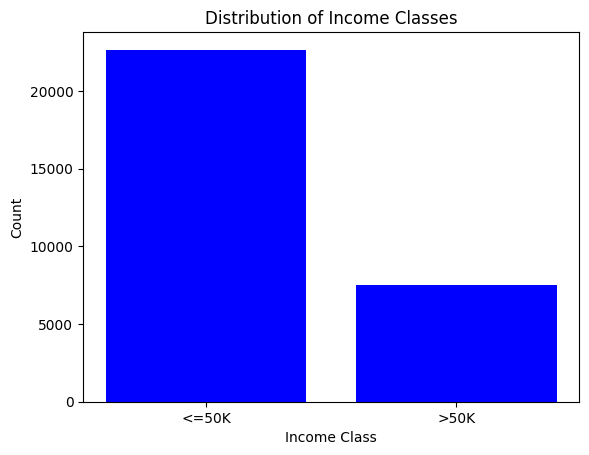

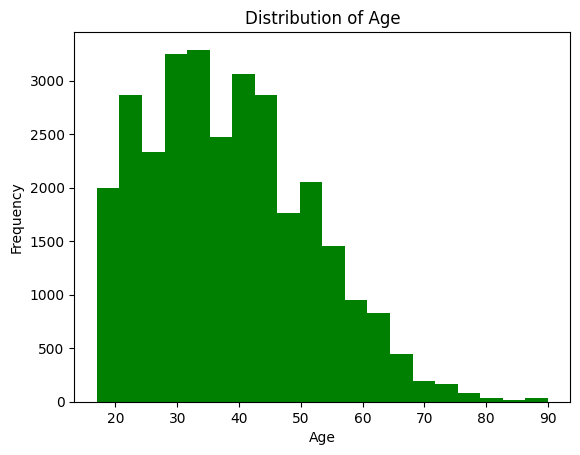


Correlation Matrix:
[[1.         0.10159876]
 [0.10159876 1.        ]]


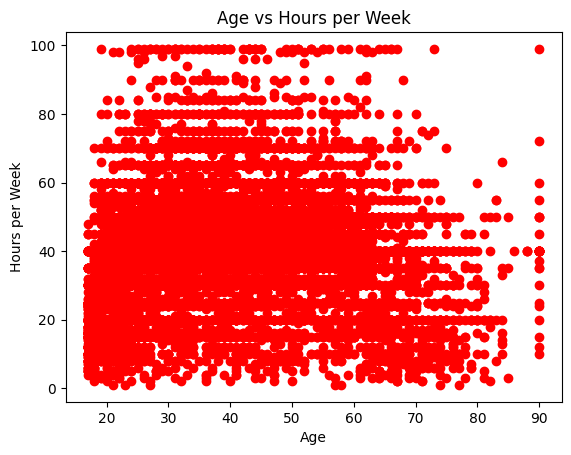

In [14]:
###################Adult_DATA cleaning and analysis#######################
#test numpy for adult data 
import matplotlib.pyplot as plt

adult_data = np.load('adult_num.npy', allow_pickle=True, fix_imports=True)  # Load data from .npy file
print(adult_data.shape) 
# print(adult_data[:5])  # Print first 5 rows to check
print(adult_data.dtype)  # Check data type

# Identify missing data (assuming it's represented as '?')
missing_rows = [i for i in range(adult_data.shape[0]) if '?' in adult_data[i]]
print('Number of missing rows: {}'.format(len(missing_rows)))

clean_adult_data = np.delete(adult_data, missing_rows, axis=0) # Delete rows with missing data
print("shape of cleaned adult data : " , clean_adult_data.shape)  # Check shape to make sure rows were deleted


# np.save('clean_adult_data', clean_adult_data, allow_pickle=True, fix_imports=True)

#----------------------------------------------------------------------
# Helper function to encode a single column of strings to integers

# Extract column names
original_column_names = clean_adult_data[0]

# Columns indices to be one-hot encoded
columns_to_encode = {
    'workclass': 1, 
    'education': 3, 
    'marital-status': 5, 
    'race': 8,
    'sex': 9
}

# Columns not to be encoded (numerical columns + target)
columns_to_keep = [0, 2, 4, 10, 11, 12, 13, 14]

# Prepare the new dataset with the original columns not encoded
hc_adult_data = clean_adult_data[1:, columns_to_keep]  # Exclude the header row

# Prepare a list for new column names, adding the names of columns that were not encoded
new_column_names = [original_column_names[i] for i in columns_to_keep]

# Function to encode a column and get new column names
def encode_column(data, column_index):
    unique_values = np.unique(data[1:, column_index])  # Exclude the header row for unique values
    encoded_columns = {}
    
    new_columns_names = []
    for value in unique_values:
        new_column_name = f"{data[0, column_index]}_{value}"  # Name it like 'column_value'
        new_columns_names.append(new_column_name)
        encoded_columns[new_column_name] = (data[1:, column_index] == value).astype(int)  # Exclude the header row for comparison
    
    return encoded_columns, new_columns_names

# Encode necessary columns and build the final dataset
for column_name, column_index in columns_to_encode.items():
    encoded_columns, new_columns_names = encode_column(clean_adult_data, column_index)
    new_column_names.extend(new_columns_names)  # Add new column names
    
    for new_column_name, encoded_column in encoded_columns.items():
        hc_adult_data = np.column_stack((hc_adult_data, encoded_column))

# Now, `new_data` contains the original numerical columns plus the one-hot encoded columns
# and `new_column_names` contains the names of the columns

print("New data shape:", hc_adult_data.shape)  # Check shape to make sure columns were added
print("New column names:", new_column_names)
# New column names: ['age', 'fnlwgt', 'education-num', 'capital-gain', 
# 'capital-loss', 'hours-per-week', 'native-country', 'income', 
# 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 
# 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 
# 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 
# 'education_11th', 'education_12th', 'education_1st-4th', 
# 'education_5th-6th', 'education_7th-8th', 'education_9th', 
# 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 
# 'education_Doctorate', 'education_HS-grad', 'education_Masters', 
# 'education_Preschool', 'education_Prof-school', 'education_Some-college', 
# 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 
# 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 
# 'marital-status_Never-married', 'marital-status_Separated', 
# 'marital-status_Widowed', 'race_Amer-Indian-Eskimo', 
# 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 
# 'sex_Female', 'sex_Male']
# 1. Distribution of classes in 'income'
income_column_index = new_column_names.index('income')
income_values, income_counts = np.unique(hc_adult_data[:, income_column_index], return_counts=True)
for value, count in zip(income_values, income_counts):
    print(f"Income value {value}: {count} instances")

# Plotting the distribution
plt.figure()
plt.bar(income_values, income_counts, color='blue')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.title('Distribution of Income Classes')
plt.show()

# 2. Distributions of numerical features (taking 'age' as an example)
age_column_index = new_column_names.index('age')
plt.figure()
plt.hist(hc_adult_data[:, age_column_index].astype(float), bins=20, color='green')  # Convert to float for numerical operations
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# 3. Correlations between the features
# First, identify the indices of numerical columns (add more if necessary)
numerical_column_indices = [new_column_names.index('age'), new_column_names.index('hours-per-week')]
numerical_data = hc_adult_data[:, numerical_column_indices].astype(float)  # Select only numerical columns and convert to float

correlation_matrix = np.corrcoef(numerical_data, rowvar=False)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 4. Scatter plots of pair-wise features (plotting 'age' vs 'hours-per-week' as an example)
age_data = hc_adult_data[:, age_column_index].astype(float)
hours_per_week_data = hc_adult_data[:, new_column_names.index('hours-per-week')].astype(float)

plt.figure()
plt.scatter(age_data, hours_per_week_data, color='red')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Age vs Hours per Week')
plt.show()


In [15]:
######### car  #######################################
# Load values into numpy array

#Instantiate array and add headings row
car = np.empty((0,7))
headings = np.array([['buying', 'maint', 'doors', 'persons', 'lugboot', 'safety', 'class']])
car = np.append(car, headings.reshape(1,7), axis=0)


#Opening the file

filename = 'car.data'
fcar = open(filename, 'r')

#Copying all data into matrix
for line in fcar:
    values = line.strip().split(',')
    row = np.array([[]])
    for value in values:
        if '.' in value:
            row = np.append(row, float(value))  # Convert to float if it contains a decimal point
        elif value.isdigit() or (value[0] == '-' and value[1:].isdigit()):
            row = np.append(row, int(value))  # Convert to int if it's a valid integer
        else:
            row = np.append(row, value)  # Keep as string if it's neither float nor int

    car = np.append(car, row.reshape(1,7), axis=0)

fcar.close()
print(car[:5])  # Print first 5 rows to check
#np.save('car_num', car, allow_pickle=True, fix_imports=True)

[['buying' 'maint' 'doors' 'persons' 'lugboot' 'safety' 'class']
 ['vhigh' 'vhigh' '2' '2' 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'med' 'low' 'unacc']]


(1729, 7)
[['buying' 'maint' 'doors' 'persons' 'lugboot' 'safety' 'class']
 ['vhigh' 'vhigh' '2' '2' 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'med' 'low' 'unacc']]
New data shape: (1728, 22)
New column names: ['class', 'buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more', 'lugboot_big', 'lugboot_med', 'lugboot_small', 'safety_high', 'safety_low', 'safety_med']
Class value acc: 384 instances
Class value good: 69 instances
Class value unacc: 1210 instances
Class value vgood: 65 instances


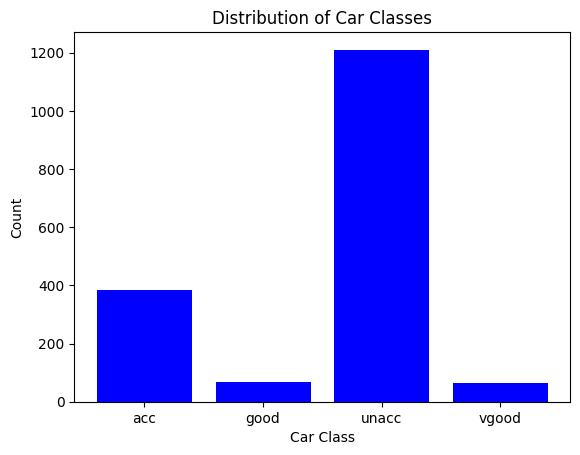

In [16]:
#-----------------Car Data Analysis and Stats----------------
import numpy as np
import matplotlib.pyplot as plt

# Load the car data
car = np.load('car_num.npy', allow_pickle=True, fix_imports=True)  # Replace with the actual path if it's different
print(car.shape)
print(car[:5])  # Print first 5 rows to check

# Extract column names
original_column_names = car[0]

# Columns to be one-hot encoded (all except the target 'class')
columns_to_encode = {
    'buying': 0, 
    'maint': 1, 
    'doors': 2, 
    'persons': 3, 
    'lugboot': 4,
    'safety': 5
}

# Columns not to be encoded (numerical columns + target)
columns_to_keep = [6]  # 'class' is the target variable and doesn't need encoding

# Prepare the new dataset with the original columns not encoded
hc_car_data = car[1:, columns_to_keep]  # Exclude the header row

# Prepare a list for new column names, adding the names of columns that were not encoded
new_column_names = [original_column_names[i] for i in columns_to_keep]

# Function to encode a column and get new column names
def encode_column(data, column_index):
    unique_values = np.unique(data[1:, column_index])  # Exclude the header row for unique values
    encoded_columns = {}
    
    new_columns_names = []
    for value in unique_values:
        new_column_name = f"{data[0, column_index]}_{value}"  # Name it like 'column_value'
        new_columns_names.append(new_column_name)
        encoded_columns[new_column_name] = (data[1:, column_index] == value).astype(int)  # Exclude the header row for comparison
    
    return encoded_columns, new_columns_names

# Encode necessary columns and build the final dataset
for column_name, column_index in columns_to_encode.items():
    encoded_columns, new_columns_names = encode_column(car, column_index)
    new_column_names.extend(new_columns_names)  # Add new column names
    
    for new_column_name, encoded_column in encoded_columns.items():
        hc_car_data = np.column_stack((hc_car_data, encoded_column))

print("New data shape:", hc_car_data.shape)  # Check shape to make sure columns were added
print("New column names:", new_column_names)

# 1. Distribution of classes in 'class'
class_column_index = new_column_names.index('class')
class_values, class_counts = np.unique(hc_car_data[:, class_column_index], return_counts=True)
for value, count in zip(class_values, class_counts):
    print(f"Class value {value}: {count} instances")

# Plotting the distribution
plt.figure()
plt.bar(class_values, class_counts, color='blue')
plt.xlabel('Car Class')
plt.ylabel('Count')
plt.title('Distribution of Car Classes')
plt.show()

# Since the car dataset doesn't contain numerical columns (except if 'doors' and 'persons' are considered numerical),
# we skip the parts for distributions of numerical features, correlations, and scatter plots.


In [17]:
################## ionosphere #######################################
import numpy as np



# Instantiate array and add headings row
ionosphere = np.empty((0,35), dtype=object)  # specify dtype=object to allow for mixed types
headings = np.array([['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18', 'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22', 'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26', 'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30', 'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34', 'class']])
ionosphere = np.append(ionosphere, headings.reshape(1,35), axis=0)

# Opening the file
filename = 'ionosphere.data'
fionosphere = open(filename, 'r')

# Copying all data into matrix
for line in fionosphere:
    values = line.strip().split(',')
    row = np.array([[]])
    for value in values:
        if '.' in value:
            row = np.append(row, float(value))  # Convert to float if it contains a decimal point
        elif value.isdigit() or (value[0] == '-' and value[1:].isdigit()):
            row = np.append(row, int(value))  # Convert to int if it's a valid integer
        else:
            row = np.append(row, value)  # Keep as string if it's neither float nor int

    ionosphere = np.append(ionosphere, row.reshape(1,35), axis=0)

fionosphere.close()

# Save the numpy array for future use
# np.save('ionosphere_num', ionosphere, allow_pickle=True, fix_imports=True)

# Print first 5 rows to check
print("First 5 rows of data:")
print(ionosphere[:5])  # Print first 5 rows to check

# Print the column names
print("\nColumn names:")
print(ionosphere[0])  # Print the first row containing column names

# Check the shape of the data
print("\nShape of the data:")
print(ionosphere.shape)


First 5 rows of data:
[['Attribute1' 'Attribute2' 'Attribute3' 'Attribute4' 'Attribute5'
  'Attribute6' 'Attribute7' 'Attribute8' 'Attribute9' 'Attribute10'
  'Attribute11' 'Attribute12' 'Attribute13' 'Attribute14' 'Attribute15'
  'Attribute16' 'Attribute17' 'Attribute18' 'Attribute19' 'Attribute20'
  'Attribute21' 'Attribute22' 'Attribute23' 'Attribute24' 'Attribute25'
  'Attribute26' 'Attribute27' 'Attribute28' 'Attribute29' 'Attribute30'
  'Attribute31' 'Attribute32' 'Attribute33' 'Attribute34' 'class']
 ['1.0' '0.0' '0.99539' '-0.05889' '0.85243' '0.02306' '0.83398'
  '-0.37708' '1.0' '0.0376' '0.85243' '-0.17755' '0.59755' '-0.44945'
  '0.60536' '-0.38223' '0.84356' '-0.38542' '0.58212' '-0.32192'
  '0.56971' '-0.29674' '0.36946' '-0.47357' '0.56811' '-0.51171'
  '0.41078' '-0.46168' '0.21266' '-0.3409' '0.42267' '-0.54487' '0.18641'
  '-0.453' 'g']
 ['1.0' '0.0' '1.0' '-0.18829' '0.93035' '-0.36156' '-0.10868' '-0.93597'
  '1.0' '-0.04549' '0.50874' '-0.67743' '0.34432' '-0.69707

Class value b: 126 instances
Class value g: 225 instances


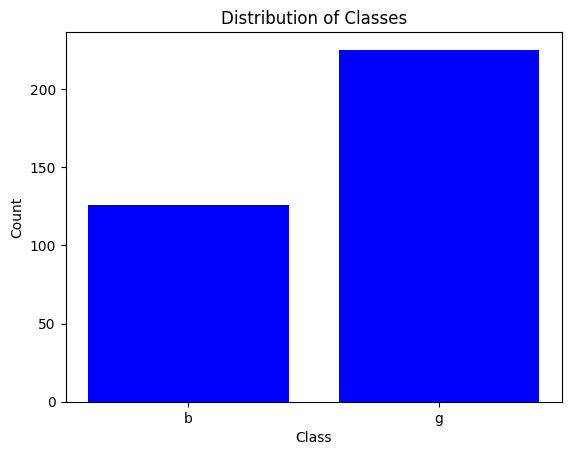

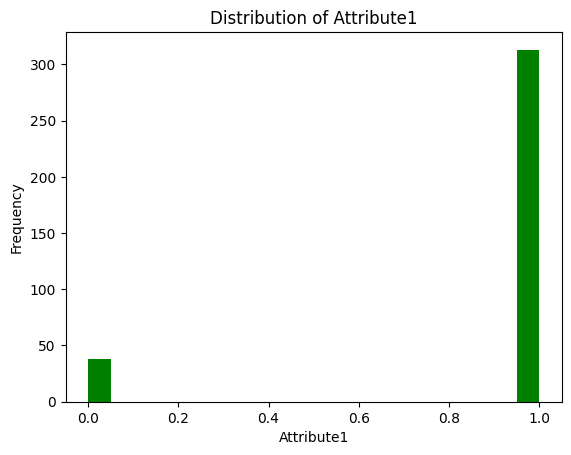


Correlation Matrix:
[[ 1.00000000e+00             nan  3.02033923e-01 ... -1.00914082e-01
   1.62961776e-01  1.07882864e-02]
 [            nan             nan             nan ...             nan
              nan             nan]
 [ 3.02033923e-01             nan  1.00000000e+00 ... -9.33243396e-03
   2.63343404e-01  5.84065993e-04]
 ...
 [-1.00914082e-01             nan -9.33243396e-03 ...  1.00000000e+00
  -1.29983835e-02  5.14992484e-01]
 [ 1.62961776e-01             nan  2.63343404e-01 ... -1.29983835e-02
   1.00000000e+00 -1.31839781e-01]
 [ 1.07882864e-02             nan  5.84065993e-04 ...  5.14992484e-01
  -1.31839781e-01  1.00000000e+00]]


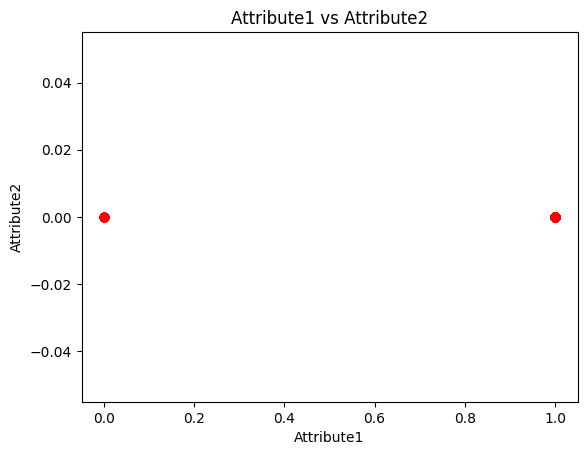

In [18]:
#---Ionosphere Data analysis and stats----------------
import numpy as np
import matplotlib.pyplot as plt

# Remove the header row for further calculations
ionosphere_data = ionosphere[1:, :-1].astype(float)  # Convert all data to float for calculations, except the target class
target_class = ionosphere[1:, -1]  # Extract the target class

# 1. Distribution of classes in 'class'
class_values, class_counts = np.unique(target_class, return_counts=True)
for value, count in zip(class_values, class_counts):
    print(f"Class value {value}: {count} instances")

# Plotting the distribution
plt.figure()
plt.bar(class_values, class_counts, color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

# 2. Distributions of numerical features (taking 'Attribute1' as an example)
# Please change the index for exploring distributions of other attributes
attribute_index = 0  # Index for 'Attribute1'
plt.figure()
plt.hist(ionosphere_data[:, attribute_index], bins=20, color='green')
plt.xlabel('Attribute1')
plt.ylabel('Frequency')
plt.title('Distribution of Attribute1')
plt.show()

# 3. Correlations between the features (excluding the target class)
correlation_matrix = np.corrcoef(ionosphere_data, rowvar=False)  # Include all attributes except the target class
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 4. Scatter plots of pair-wise features (plotting 'Attribute1' vs 'Attribute2' as an example)
# Change the indices for other attributes
attribute1_data = ionosphere_data[:, 0]
attribute2_data = ionosphere_data[:, 1]

plt.figure()
plt.scatter(attribute1_data, attribute2_data, color='red')
plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.title('Attribute1 vs Attribute2')
plt.show()


In [19]:
#######################################  iris  #######################################

#Instantiate array and add headings row
iris = np.empty((0,5))
headings = np.array([['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']])
iris = np.append(iris, headings.reshape(1,5), axis=0)


#Opening the file
filename = 'iris.data'
firis = open(filename, 'r')

#Copying all data into matrix
for line in firis:
    values = line.strip().split(',')
    row = np.array([[]])
    for value in values:
        if '.' in value:
            row = np.append(row, float(value))  # Convert to float if it contains a decimal point
        elif value.isdigit() or (value[0] == '-' and value[1:].isdigit()):
            row = np.append(row, int(value))  # Convert to int if it's a valid integer
        else:
            row = np.append(row, value)  # Keep as string if it's neither float nor int

    iris = np.append(iris, row.reshape(1,5), axis=0)

firis.close()
print(iris[:5])  # Print first 5 rows to check
#np.save('iris_num', iris, allow_pickle=True, fix_imports=True)

[['sepal-length' 'sepal-width' 'petal-length' 'petal-width' 'class']
 ['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']]


Class value Iris-setosa: 50 instances
Class value Iris-versicolor: 50 instances
Class value Iris-virginica: 50 instances


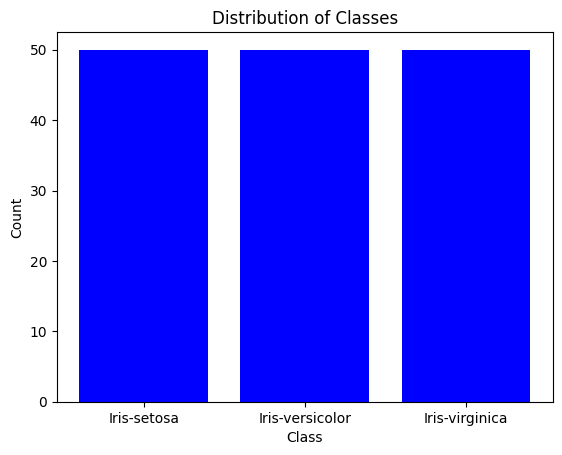

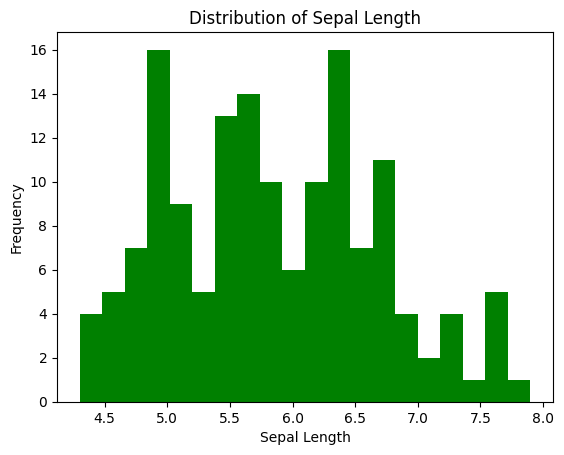


Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


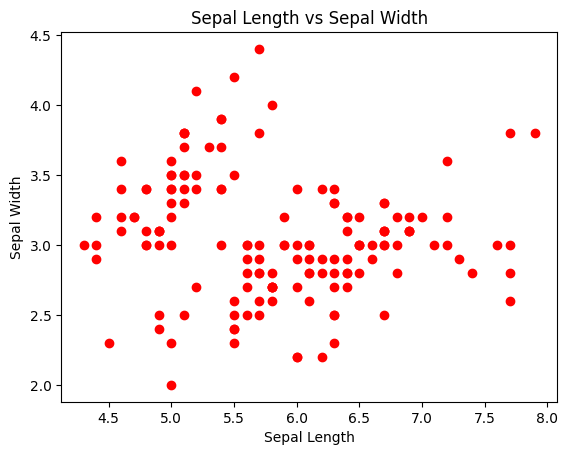

In [20]:
##################iris_DATA cleaning and analysis#######################
import numpy as np
import matplotlib.pyplot as plt

# Remove the header row for further calculations
iris_data = iris[1:, :-1].astype(float)  # Convert all data to float for calculations, except the target class
target_class = iris[1:, -1]  # Extract the target class

# 1. Distribution of classes in 'class'
class_values, class_counts = np.unique(target_class, return_counts=True)
for value, count in zip(class_values, class_counts):
    print(f"Class value {value}: {count} instances")

# Plotting the distribution
plt.figure()
plt.bar(class_values, class_counts, color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

# 2. Distributions of numerical features (taking 'sepal-length' as an example)
# Please change the index for exploring distributions of other attributes
attribute_index = 0  # Index for 'sepal-length'
plt.figure()
plt.hist(iris_data[:, attribute_index], bins=20, color='green')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')
plt.show()

# 3. Correlations between the features (excluding the target class)
correlation_matrix = np.corrcoef(iris_data, rowvar=False)  # Include all attributes except the target class
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 4. Scatter plots of pair-wise features (plotting 'sepal-length' vs 'sepal-width' as an example)
# Change the indices for other attributes
attribute1_data = iris_data[:, 0]
attribute2_data = iris_data[:, 1]

plt.figure()
plt.scatter(attribute1_data, attribute2_data, color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()


In [21]:
#######PART 2######################
import os
import numpy as np
import matplotlib.pyplot as plt

def one_hot(X):

    # Initialize an array to store the one-hot encoded features
    encoded_features = np.zeros(X.shape)

    for i, column in enumerate(X.T):
        categories = np.unique(column)
        category_to_index = {category: idx for idx, category in enumerate(categories)}
        for j, val in enumerate(column):
            if val in category_to_index:
                encoded_features[j,i] = int(category_to_index[val])
    
    return encoded_features



################################  Logistic Regression  ###############################
class LogisticRegression:

    # LR Constructor sets the chosen Learning Rate and Cost Change target 
    def __init__(self, learning_rate=0.01, cost_target=1e-5):
        self.learning_rate = learning_rate
        self.cost_target = cost_target


    # Takes the dot product of w and x returns the probability x = 1 for all x given w,b
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))



    # Takes y hat and y and returns cost
    def cost(self, y_hat, y_real):
        # Epsilon prevents the program from trying to take the log of 0
        epsilon = 1e-15
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

        # Returns cost function
        return -np.mean(y_real * np.log(y_hat) + (1 - y_real) * np.log(1 - y_hat))


    # Trains model
    def fit(self, X, y):

        # Add a column of ones for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.theta = np.zeros(X.shape[1])

        # No existing cost will set cost delta of first loop equal to 
        old_cost = 0.0
        # A value larger than any entered cost delta target should be
        cost_delta = float('inf')

        iteration = 0
        while self.cost_target < cost_delta:

            y_hat = self.sigmoid(np.dot(X, self.theta))
            new_cost = self.cost(y_hat, y)
            error = y_hat - y
            gradient = np.dot(X.T, error) / len(y)
            self.theta -= self.learning_rate * gradient

            if new_cost - old_cost >= 0:
                cost_delta = new_cost - old_cost

            else:
                # Prevents the case of an increase in cost ending the program
                cost_delta = float('inf')


            old_cost = new_cost

            iteration += 1
            if iteration % 200 == 0:
                print(f"Cost: {old_cost}, Cost change: {cost_delta}")


    def predict(self, X):
        # Add a column of ones for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_hat = self.sigmoid(np.dot(X, self.theta))
        return (y_hat >= 0.5).astype(int)
    

    def evaluate_acc(self, X, y):

        y_hat = self.predict(X)
        accuracy = np.zeros(len(y))
        for i, val in enumerate(y_hat):
            accuracy[i] = 1- abs(y[i] - val)

        print('Model Accuracy:')

        print(str(np.mean(accuracy)))

    



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, y_hat, y_real):
        epsilon = 1e-15
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
        return -np.mean(y_real * np.log(y_hat) + (1 - y_real) * np.log(1 - y_hat))

def fit(self, X, y):
    m, n = X.shape
    self.theta = np.zeros(n)
    for _ in range(self.num_iterations):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m  # Corrected "grpadient" to "gradient"
        self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        predictions = (h >= 0.5).astype(int)
        return predictions

class KNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

def evaluate_acc(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

def one_hot(X):
    encoded_features = np.zeros(X.shape)
    for i, column in enumerate(X.T):
        categories = np.unique(column)
        category_to_index = {category: idx for idx, category in enumerate(categories)}
        for j, val in enumerate(column):
            if val in category_to_index:
                encoded_features[j, i] = int(category_to_index[val])
    return encoded_features

def k_fold_cross_validation(model, X, y, k):
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = evaluate_acc(y_test, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    return mean_accuracy



